In [2]:
import pandas as pd
from bertopic import BERTopic
import matplotlib.pyplot as plt

/Users/anushkachougule/Desktop/inst750-final-project/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load clean and processed dataset
df = pd.read_csv("../data/processed_with_bert_score.csv")

# Basic cleaning (to make sure)
df = df[df['desc'].notna()]
df['desc_clean'] = df['desc'].str.replace(r"Borrower added on \d{2}/\d{2}/\d{2} >", "", regex=True)
df['desc_clean'] = df['desc_clean'].str.lower().str.strip()

print(df['desc_clean'].head())

0    this loan is to refinance and consolidate cred...
1    debt relief<br><br>   im looking for the end o...
2    i am applying for a loan because i want to pay...
3     consolidate credit cards and loans into one.<br>
4    i am consolidating my high interest loans and ...
Name: desc_clean, dtype: object


/var/folders/1n/k2rpq0810dl2zgrrw3bk2tlw0000gn/T/ipykernel_94116/1984744805.py:2: DtypeWarning: Columns (123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed_with_bert_score.csv")


In [5]:
# Create BERTopic model
topic_model = BERTopic(verbose=True)

# Fit the model
topics, probs = topic_model.fit_transform(df['desc_clean'])
df['topic_id'] = topics


2025-05-13 15:03:08,268 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 468/468 [00:26<00:00, 17.81it/s]
2025-05-13 15:03:35,648 - BERTopic - Embedding - Completed ✓
2025-05-13 15:03:35,649 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-05-13 15:03:45,241 - BERTopic - Dimensionality - Completed ✓
2025-05-13 15:03:45,242 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-05-13 15:03:45,577 - BERTopic - Cluster - Completed ✓
2025-05-13 15:03:45,583 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-13 15:03:45,819 - BERTopic - Representation - Completed ✓


In [6]:
# View top 10 topics and their keywords
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6777,-1_my_to_and_the,"[my, to, and, the, have, loan, this, credit, p...",[this loan is used to pay for two home improve...
1,0,315,0_business_equipment_expand_marketing,"[business, equipment, expand, marketing, capit...",[this loan is for the expansion of my business...
2,1,297,1_consolidationbr_debt_consolidation_taxesbr,"[consolidationbr, debt, consolidation, taxesbr...","[debt consolidation<br>, debt consolidation<br..."
3,2,188,2_club_lending_loan_rate,"[club, lending, loan, rate, with, great, clubb...",[the lending club loan is to pay off all credi...
4,3,170,3_interest_high_want_cards,"[interest, high, want, cards, rate, like, rate...",[would like to pay off high interest rate cred...
5,4,158,4_home_improvements_improvement_garage,"[home, improvements, improvement, garage, kitc...",[the loan is going to be used for home improve...
6,5,155,5_funds_these_use_plan,"[funds, these, use, plan, stable, job, borrowe...",[the funds will be use to consolidate credit c...
7,6,125,6_consolidate_card_loan_is,"[consolidate, card, loan, is, used, debtbr, co...",[this loan will be used to consolidate credit ...
8,7,118,7_vehicle_car_purchase_jeep,"[vehicle, car, purchase, jeep, reliable, carbr...",[i would like to get a small loan to purchase ...
9,8,115,8_consolidate_credit_card_cardsbr,"[consolidate, credit, card, cardsbr, high, med...",[to consolidate some high interest credit card...


In [7]:
# Number of topics generated by BERTopic
num_topics = df['topic_id'].nunique()
print(f"Total topics generated: {num_topics}")

Total topics generated: 199


In [8]:
# Reduce to 40 broader topics
topic_model = topic_model.reduce_topics(df['desc_clean'], nr_topics=40)

2025-05-13 15:03:53,911 - BERTopic - Topic reduction - Reducing number of topics
2025-05-13 15:03:53,933 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-05-13 15:03:54,137 - BERTopic - Representation - Completed ✓
2025-05-13 15:03:54,139 - BERTopic - Topic reduction - Reduced number of topics from 199 to 40


In [9]:
# Re-assign reduced topic IDs
df['reduced_topic_id'] = topic_model.transform(df['desc_clean'])[0]


Batches: 100%|██████████| 468/468 [00:21<00:00, 22.23it/s]
2025-05-13 15:04:17,429 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-05-13 15:04:17,566 - BERTopic - Dimensionality - Completed ✓
2025-05-13 15:04:17,567 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-05-13 15:04:17,850 - BERTopic - Cluster - Completed ✓


In [10]:
# Number of topics after reduction
num_reduced = df['reduced_topic_id'].nunique()
print(f"Reduced topic count: {num_reduced}")

Reduced topic count: 40


In [11]:
# View dataset
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6777,-1_to_my_and_the,"[to, my, and, the, credit, loan, have, pay, th...",[i will use the loan to consolidate my high in...
1,0,2133,0_consolidationbr_debt_consolidate_consolidation,"[consolidationbr, debt, consolidate, consolida...",[i would like to consolidate all my debt into ...
2,1,1521,1_loan_my_to_this,"[loan, my, to, this, the, is, and, for, of, have]",[the purpose of the loan is to cosolidate my d...
3,2,876,2_cardsbr_off_pay_credit,"[cardsbr, off, pay, credit, high, card, intere...","[pay off high interest credit card<br>, pay of..."
4,3,624,3_pay_credit_off_cards,"[pay, credit, off, cards, want, to, like, woul...",[i have three credit cards i want to pay off a...
5,4,376,4_loan_for_home_the,"[loan, for, home, the, car, is, to, vehicle, t...",[we are in the process of buying a home for th...
6,5,338,5_funds_use_my_plan,"[funds, use, my, plan, to, job, debt, and, hav...","[i have a stable, good paying job at a very go..."
7,6,334,6_consolidate_to_pay_credit,"[consolidate, to, pay, credit, off, high, inte...",[to consolidate my credit card debt and pay it...
8,7,315,7_business_the_in_for,"[business, the, in, for, and, of, will, to, eq...",[this is for business purposes - it would not ...
9,8,153,8_refinance_refinancingbr_card_credit,"[refinance, refinancingbr, card, credit, refin...",[refinance credit cards at a lower interest ra...


In [12]:
# Group topic-level statistics
topic_risk_summary = df.groupby('reduced_topic_id').agg(
    count=('reduced_topic_id', 'size'),
    default_rate=('loan_status_binary', 'mean'),
    avg_bert_risk=('bert_risk_score', 'mean')
).reset_index()

# Sort by default rate
topic_risk_summary = topic_risk_summary.sort_values('default_rate', ascending=False)

topic_risk_summary.head(10)


,reduced_topic_id,count,default_rate,avg_bert_risk
8,7,315,0.517460,0.501566
14,13,90,0.400000,0.351200
18,17,70,0.400000,0.404057
17,16,70,0.385714,0.343284
10,9,134,0.373134,0.361033
13,12,101,0.366337,0.351784
39,38,11,0.363636,0.227996
27,26,33,0.363636,0.263312
36,35,14,0.357143,0.144837
1,0,2133,0.352555,0.341459


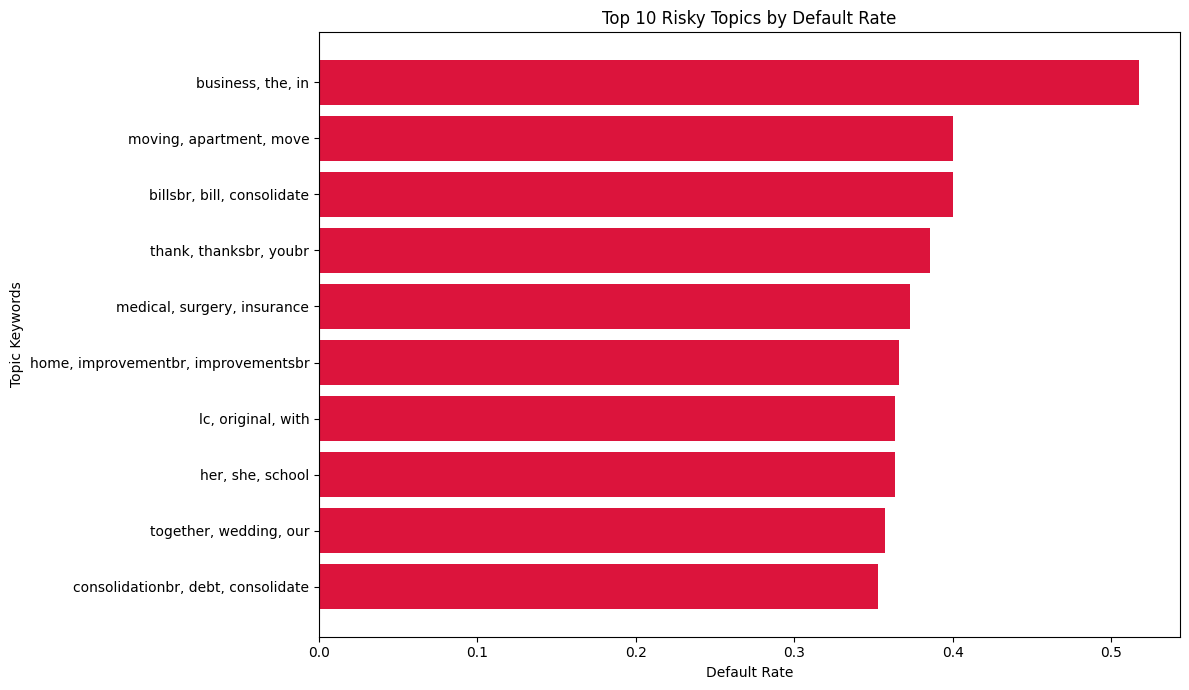

In [13]:
# Get keywords for each topic
def get_keywords(topic_id):
    keywords = topic_model.get_topic(topic_id)
    return ", ".join([kw for kw, _ in keywords[:3]])

# Add to summary DataFrame
topic_risk_summary['keywords'] = topic_risk_summary['reduced_topic_id'].apply(get_keywords)

# Sort by default rate
top_risky_topics = topic_risk_summary.sort_values('default_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 7))
plt.barh(top_risky_topics['keywords'], top_risky_topics['default_rate'], color='crimson')
plt.xlabel("Default Rate")
plt.ylabel("Topic Keywords")
plt.title("Top 10 Risky Topics by Default Rate")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



The above bar chart shows the 10 topic clusters (from BERTopic) with the highest average default rates.

- **"Business financing"**, **"paying bills"**, and **"home improvement"** themes appear consistently across the riskiest clusters.
- Narratives mentioning **medical bills**, **moving expenses**, or **school-related reasons** also show high risk — suggesting potential financial instability.
- Each topic is labeled by its top 3 keywords, making it easier to interpret borrower intent.

This plot highlights the value of unsupervised topic modeling for uncovering hidden patterns in borrower motivations and linking them to financial risk.

In [14]:
# 2D visuailization
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'consolidationbr | debt | consolidate | consolidation | credit',
                                    2133],
                                   [1, 'loan | my | to | this | the', 1521],
                                   [2, 'cardsbr | off | pay | credit | high', 876],
                                   [3, 'pay | credit | off | cards | want', 624],
                                   [4, 'loan | for | home | the | car', 376],
                                   [5, 'funds | use | my | plan | to', 338],
                                   [6, 'consolidate | to | pay | credit | off', 334],
                                   [7, 'business | the | in | for | and', 315],
                                   [8, 'refinance | refinancingbr | card | credit | refinancing', 153],
                                   [9, 'medical | surgery | insurance | not | for', 134],
                                   [10, 'wedding | our | for | the | we', 133],
                                   [11, 'pool | poolbr | swimming | inground | we', 104],
                                   [12, 'home | improvementbr | improvementsbr | improvement | house',
                                    101],
                                   [13, 'moving | apartment | move | need | deposit', 90],
                                   [14, 'added | on | have | my | for', 81],
                                   [15, 'never | late | payment | have | missed', 75],
                                   [16, 'thank | thanksbr | youbr | you | email', 70],
                                   [17, 'billsbr | bill | consolidate | consolidationbr | bills', 70],
                                   [18, 'medical | billsbr | consolidation | hospital | bills', 57],
                                   [19, 'kitchen | bathroom | remodel | remodeling | bathroombr', 57],
                                   [20, 'consolidationbr | debit | dept | consolidation | consolidatebr',
                                    57],
                                   [21, 'land | property | funds | in | for', 55],
                                   [22, 'car | purchase | truck | vehiclebr | buy', 50],
                                   [23, 'irs | 401k | tax | taxes | the', 48],
                                   [24, 'vacation | vacationbr | family | take | see', 42],
                                   [25, 'roof | new | roofbr | replace | need', 35],
                                   [26, 'her | she | school | tuition | attend', 33],
                                   [27, 'boat | boatbr | purchase | motor | we', 29],
                                   [28, 'taxesbr | taxes | taxesbrbr | tax | irs', 26],
                                   [29, 'ring | engagement | girlfriend | an | wedding', 25],
                                   [30, 'same | job | for | company | worked', 24],
                                   [31, 'repairsbr | car | auto | repair | carbr', 22],
                                   [32, 'motorcycle | davidson | harley | miles | bike', 20],
                                   [33, 'fence | patio | wooden | yard | water', 18],
                                   [34, 'unit | air | panel | there | conditioning', 17],
                                   [35, 'together | wedding | our | weddingbr | fianceacute', 14],
                                   [36, 'trailerbr | carbr | motorbr | atvbr | chev', 13],
                                   [37, 'citi | capital | discover | bank | citibank', 13],
                                   [38, 'lc | original | with | loan | 2nd', 11]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': {'bdata': ('VQjxBWwDcAJ4AVIBTgE7AZkAhgCFAG' ... 'AaABkAGAAWABQAEgARAA4ADQANAA

The interactive 2D visualization shows the semantic relationships between the topic clusters generated by BERTopic.

- Each circle represents a topic, and the size indicates the number of borrower narratives in that cluster.
- The distance between topics reflects **semantic similarity**: topics closer together are more similar in meaning, while distant ones are more distinct.
- The spread of clusters suggests that the **topic reduction to 40** has preserved meaningful diversity, with some well-separated themes (e.g., business loans vs. medical expenses).

This view supports qualitative validation of the topic model and helps identify any remaining clusters that could potentially be merged.


In [15]:
# Only keep needed columns
topic_assignments = df[['desc', 'reduced_topic_id']]

# Save to dataframe to CSV
topic_assignments.to_csv("topic_assignments.csv", index=False)
print("Topic assignments saved to 'topic_assignments.csv'")


Topic assignments saved to 'topic_assignments.csv'


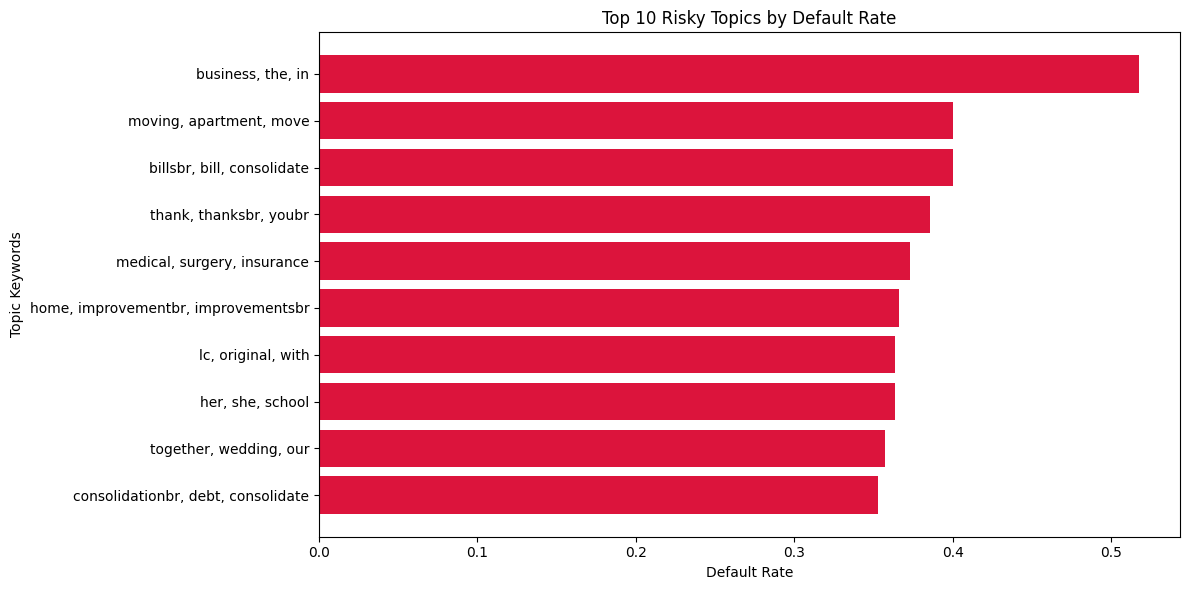

In [17]:
# --- Get top 10 topics by default rate ---
top10_topics = topic_risk_summary.head(10).copy()


# Get top 3 keywords per topic for better labels
top10_topics['label'] = top10_topics['reduced_topic_id'].apply(
    lambda tid: ', '.join([word for word, _ in topic_model.get_topic(tid)[:3]])
)

# --- Plot ---
plt.figure(figsize=(12, 6))
bars = plt.barh(top10_topics['label'], top10_topics['default_rate'], color='crimson')
plt.xlabel("Default Rate")
plt.ylabel("Topic Keywords")
plt.title("Top 10 Risky Topics by Default Rate")
plt.gca().invert_yaxis()  # Show highest default rate on top
plt.tight_layout()
plt.show()
